In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:
#stationID = 'USC00131319' #Cedar Rapids, IA
#stationID = 'USW00003947' #Kansas City, MO 
#stationID = 'USW00093822' #Springfield, IL 

filename = 'Data/merged_dly_tmax_tmin_2012_USW00093822.csv'
df_data = pd.read_csv(filename, index_col=0)

In [3]:
df_data.head()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-01-01,1,48.0,32.0,34.9,12.7,19.3,13.2
2012-01-02,2,32.0,19.0,34.8,12.6,19.2,13.2
2012-01-03,3,34.0,11.0,34.7,12.6,19.1,13.2
2012-01-04,4,48.0,30.0,34.6,12.6,19.0,13.2
2012-01-05,5,59.0,27.0,34.6,12.6,19.0,13.1


In [4]:
df_data.tail()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-12-27,362,31.0,24.0,35.4,12.6,19.9,13.0
2012-12-28,363,34.0,28.0,35.3,12.7,19.8,13.1
2012-12-29,364,31.0,18.0,35.1,12.7,19.7,13.1
2012-12-30,365,42.0,18.0,35.0,12.7,19.6,13.2
2012-12-31,366,36.0,22.0,34.9,12.7,19.4,13.2


In [5]:
#Check for missing data
print(df_data.isna().sum())

Day_of_Year    0
Tmax_dly       0
Tmin_dly       0
Tmax_norm      0
Tmax_std       0
Tmin_norm      0
Tmin_std       0
dtype: int64


In [6]:
start_date = '2012-04-01'
end_date = '2012-11-30'
df_sliced = df_data.loc[start_date:end_date]

In [7]:
temps_max = df_sliced[['Tmax_dly']].values 
temps_min = df_sliced[['Tmin_dly']].values

In [40]:
scaler = StandardScaler()
max_scaled = scaler.fit_transform(temps_max)
min_scaled = scaler.fit_transform(temps_min)

(array([ 1.,  1.,  5.,  5.,  9.,  7., 12.,  7., 13., 12., 14., 23., 21.,
        12., 27., 20., 23., 16.,  7.,  9.]),
 array([ 36. ,  39.4,  42.8,  46.2,  49.6,  53. ,  56.4,  59.8,  63.2,
         66.6,  70. ,  73.4,  76.8,  80.2,  83.6,  87. ,  90.4,  93.8,
         97.2, 100.6, 104. ]),
 <BarContainer object of 20 artists>)

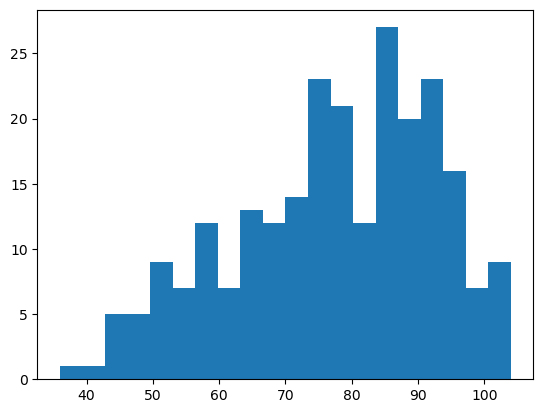

In [49]:
plt.hist(temps_max, bins=20)

(array([ 1.,  1.,  5.,  5.,  9.,  7., 12.,  7., 13., 12., 14., 23., 21.,
        12., 27., 20., 23., 16.,  7.,  9.]),
 array([-2.73148151, -2.50672084, -2.28196017, -2.0571995 , -1.83243883,
        -1.60767817, -1.3829175 , -1.15815683, -0.93339616, -0.70863549,
        -0.48387482, -0.25911416, -0.03435349,  0.19040718,  0.41516785,
         0.63992852,  0.86468919,  1.08944986,  1.31421052,  1.53897119,
         1.76373186]),
 <BarContainer object of 20 artists>)

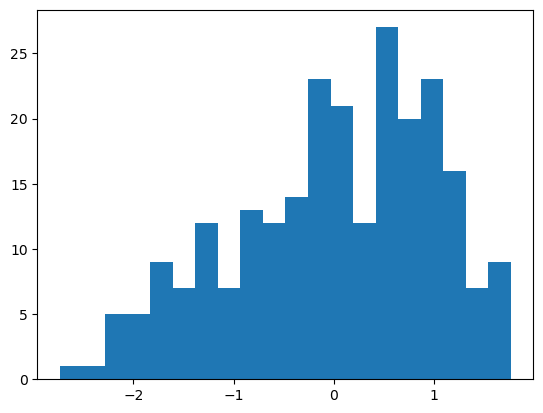

In [48]:
plt.hist(max_scaled, bins=20)

In [50]:
#ocsvm_model = OneClassSVM(nu=0.05)
ocsvm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)

#Tmax anomalies 
ocsvm_model.fit(max_scaled)

anomaly_scores_Tmax = ocsvm_model.score_samples(max_scaled)
print(max_scaled)
print('')
print(anomaly_scores_Tmax)
print('')
df_sliced['Tmax_anomaly_sc'] = anomaly_scores_Tmax
predictions = ocsvm_model.predict(max_scaled)
print(predictions)
df_sliced['Tmax_anomaly_pr'] = ocsvm_model.predict(max_scaled)

#Tmin anomalies
ocsvm_model.fit(temps_min)

anomaly_scores_Tmin = ocsvm_model.score_samples(temps_min)
df_sliced['Tmin_anomaly_sc'] = anomaly_scores_Tmin
df_sliced['Tmin_anomaly_pr'] = ocsvm_model.predict(temps_min)

#Extract anomalies for plotting  
df_anomalies_Tmax = df_sliced[df_sliced['Tmax_anomaly_pr'] == -1]
df_anomalies_Tmin = df_sliced[df_sliced['Tmin_anomaly_pr'] == -1]



#ocsvm_model.fit(max_scaled)
#df_sliced['Tmax_anomaly'] = ocsvm_model.predict(max_scaled)

#ocsvm_model.fit(min_scaled)
#df_sliced['Tmin_anomaly'] = ocsvm_model.predict(min_scaled)

#Tmax_anomalies = df_sliced[df_sliced['Tmax_anomaly'] == -1]
#Tmin_anomalies = df_sliced[df_sliced['Tmin_anomaly'] == -1]

[[ 0.7060346 ]
 [ 0.63992852]
 [ 0.57382244]
 [-0.41776874]
 [-0.8805113 ]
 [-0.8805113 ]
 [-0.74829914]
 [-0.5499809 ]
 [-0.41776874]
 [-1.14493561]
 [-1.27714777]
 [-0.81440522]
 [-1.40935993]
 [-0.41776874]
 [-0.08723835]
 [-0.8805113 ]
 [-0.5499809 ]
 [-0.28555659]
 [ 0.11107989]
 [-0.81440522]
 [-1.07882953]
 [-1.21104169]
 [-0.8805113 ]
 [-0.41776874]
 [ 0.50771636]
 [-0.08723835]
 [-1.07882953]
 [-0.5499809 ]
 [-1.21104169]
 [-0.5499809 ]
 [ 0.04497381]
 [ 0.50771636]
 [ 0.50771636]
 [ 0.17718597]
 [ 0.63992852]
 [ 0.83824676]
 [-0.21945051]
 [-0.08723835]
 [-0.41776874]
 [-0.28555659]
 [-0.08723835]
 [-0.21945051]
 [ 0.04497381]
 [ 0.30939812]
 [ 0.50771636]
 [-0.02113227]
 [ 0.17718597]
 [ 0.57382244]
 [ 0.83824676]
 [ 0.83824676]
 [-0.5499809 ]
 [-0.15334443]
 [ 0.30939812]
 [ 0.77214068]
 [ 0.7060346 ]
 [ 0.90435283]
 [ 0.90435283]
 [ 0.90435283]
 [ 0.57382244]
 [ 0.04497381]
 [-1.21104169]
 [-0.61608698]
 [-0.08723835]
 [ 0.3755042 ]
 [-0.02113227]
 [ 0.17718597]
 [ 0.04497

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_50256/3734139528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmax_anomaly_sc'] = anomaly_scores_Tmax
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_50256/3734139528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmax_anomaly_pr'] = ocsvm_model.predict(max_scaled)
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_50256/3734139528.py:21: SettingWithCopyWarning: 
A value is trying to be set on a

In [33]:
print(df_anomalies_Tmax)

            Day_of_Year  Tmax_dly  Tmin_dly  Tmax_norm  Tmax_std  Tmin_norm  \
DATE                                                                          
2012-04-05           96      64.0      40.0       60.6      11.7       38.8   
2012-04-06           97      64.0      32.0       61.0      11.7       39.1   
2012-04-08           99      69.0      41.0       61.8      11.6       39.8   
2012-04-12          103      65.0      31.0       63.3      11.3       41.2   
2012-04-15          106      76.0      58.0       64.5      11.0       42.2   
...                 ...       ...       ...        ...       ...        ...   
2012-11-23          328      49.0      30.0       48.2      10.9       30.7   
2012-11-24          329      36.0      23.0       47.6      10.9       30.2   
2012-11-25          330      51.0      33.0       47.1      10.9       29.8   
2012-11-26          331      46.0      27.0       46.5      10.9       29.3   
2012-11-30          335      64.0      42.0       44

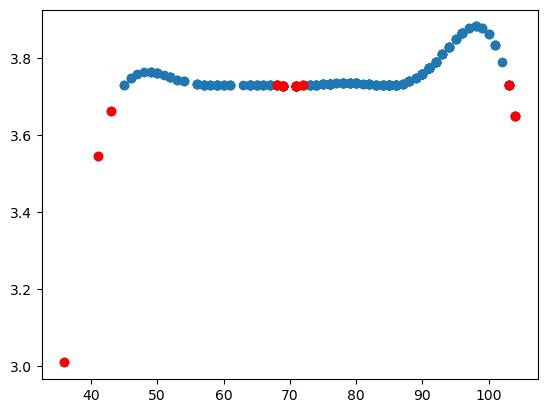

In [51]:
plt.scatter(df_sliced['Tmax_dly'], df_sliced['Tmax_anomaly_sc'])
plt.scatter(df_anomalies_Tmax['Tmax_dly'], df_anomalies_Tmax['Tmax_anomaly_sc'], color='red', label='Anomaly')

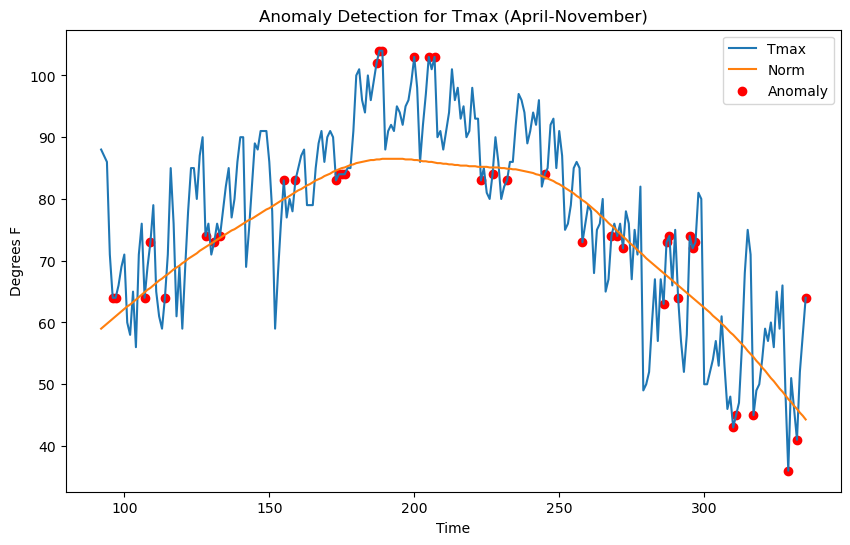

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'], label='Tmax')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_norm'], label='Norm')
plt.scatter(df_anomalies_Tmax['Day_of_Year'], df_anomalies_Tmax['Tmax_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmax (April-November)')

plt.legend()
plt.show()

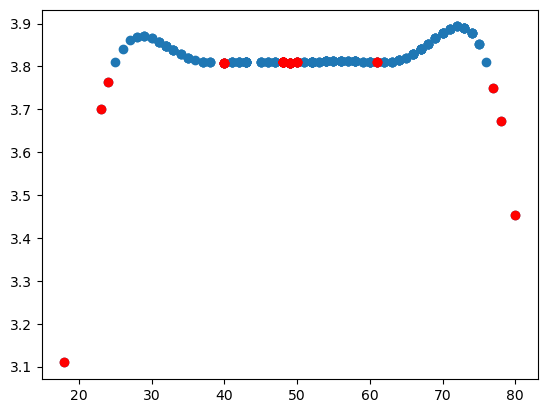

In [15]:
plt.scatter(df_sliced['Tmin_dly'], df_sliced['Tmin_anomaly_sc'])
plt.scatter(df_anomalies_Tmin['Tmin_dly'], df_anomalies_Tmin['Tmin_anomaly_sc'], color='red', label='Anomaly')

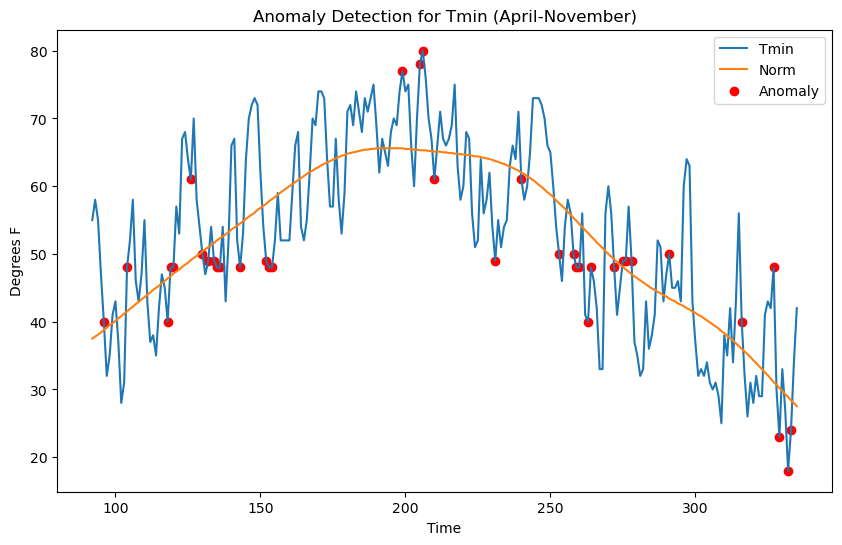

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_dly'], label='Tmin')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_norm'], label='Norm')
plt.scatter(df_anomalies_Tmin['Day_of_Year'], df_anomalies_Tmin['Tmin_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmin (April-November)')

plt.legend()
plt.show()